In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [6]:
df_geo = pd.read_csv("../data/TwitterPlaceId.csv", sep="\t", index_col="place_id")
df_tweets_geo = pd.read_csv("../data/GeoTweets.csv", sep="\t")
df_google_geo = pd.read_csv("../data/GoogleTrendGeo.csv", sep="\t")
shp = gpd.read_file("../data/GeoShape/cb_2018_us_cbsa_20m/cb_2018_us_cbsa_20m.shp")

In [7]:
nationfile = pd.read_csv("../data/Nationfile.csv", sep="|")

In [8]:
nationfile["FEATURE_CLASS"].value_counts()

Church             231980
Stream             231703
School             216507
Populated Place    199798
Locale             160891
                    ...  
Crater                248
Unknown               176
Lava                  168
Sea                    32
Isthmus                28
Name: FEATURE_CLASS, Length: 64, dtype: int64

In [9]:
def plot(gdf: gpd.GeoDataFrame, column: str, title: str):
    ax = plt.subplots(figsize=(12.5, 12.5))[1]
    gdf.plot(column=column, cmap="Reds", linewidth=0.1, edgecolor="white", ax=ax)
    
    ax.set_xlim(-130, -60)
    ax.set_ylim(20, 50)
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

def plot_tweet_geo(date: str, shp: gpd.GeoDataFrame, df_tweets_geo: pd.DataFrame, df_geo: pd.DataFrame):
    geo_count = df_tweets_geo[df_tweets_geo["Date"].astype(str)==date]["geo"].value_counts()
    geo = df_geo[df_geo.index.isin(geo_count.index)]
    geo = geo[geo["country_code"]=="US"]
    geo["count"] = geo_count
    geometry = [Point(xy) for xy in zip(geo["longitude"], geo["latitude"])]
    geo = gpd.GeoDataFrame(geo, geometry=geometry, crs="EPSG:4326")
    geo = gpd.sjoin(geo, shp, op="within", how="left")

    gdf = shp.set_index(["NAME"])
    gdf["count"] = geo.groupby(["NAME"]).count()["count"]
    gdf["count"] = gdf["count"].fillna(0)
    plot(gdf, "count", f"Density by Tweet on {date}")


def plot_google_geo(date: str, shp: gpd.GeoDataFrame, df_google_geo: pd.DataFrame):
    geo = df_google_geo[df_google_geo["Date"].astype(str)==date]
    geometry = [Point(xy) for xy in zip(geo["longitude"], geo["latitude"])]
    geo = gpd.GeoDataFrame(geo, geometry=geometry, crs="EPSG:4326")
    geo = gpd.sjoin(geo, shp, op="within", how="left")

    gdf = shp.set_index(["NAME"])
    gdf["value"] = geo.groupby(["NAME"]).mean()["Value"]
    gdf["value"] = gdf["value"].fillna(0)
    plot(gdf, "value", f"Density by Google on {date}")


/home/panda/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_952/309587238.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  geo = gpd.sjoin(geo, shp, op="within", how="left")


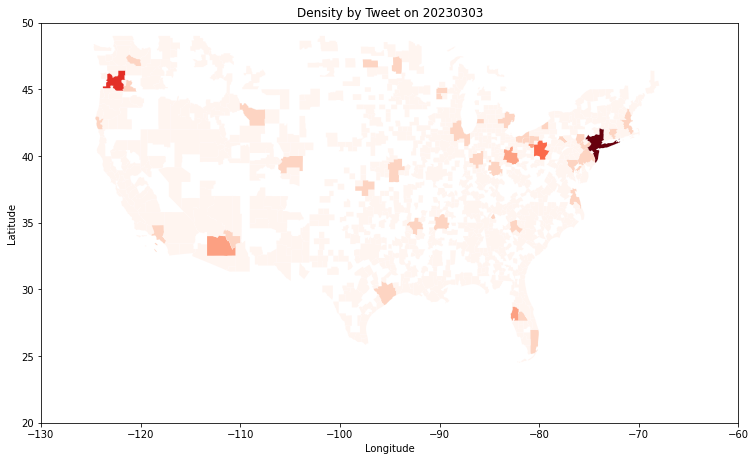

In [12]:
date = "20230303"

plot_tweet_geo(date, shp, df_tweets_geo, df_geo)
# plot_google_geo(date, shp, df_google_geo)

/home/panda/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_370/2985542679.py:29: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  geo = gpd.sjoin(geo, shp, op="within", how="left")


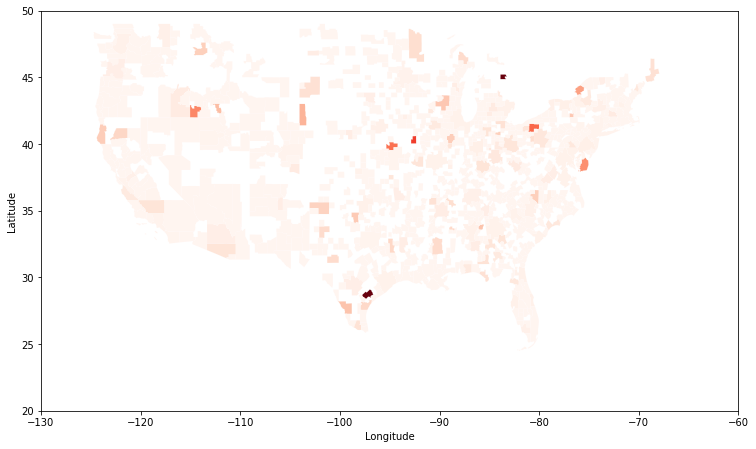

In [86]:
date = "20230210"

# plot_tweet_geo(date, shp, df_tweets_geo, df_geo)
plot_google_geo(date, shp, df_google_geo)